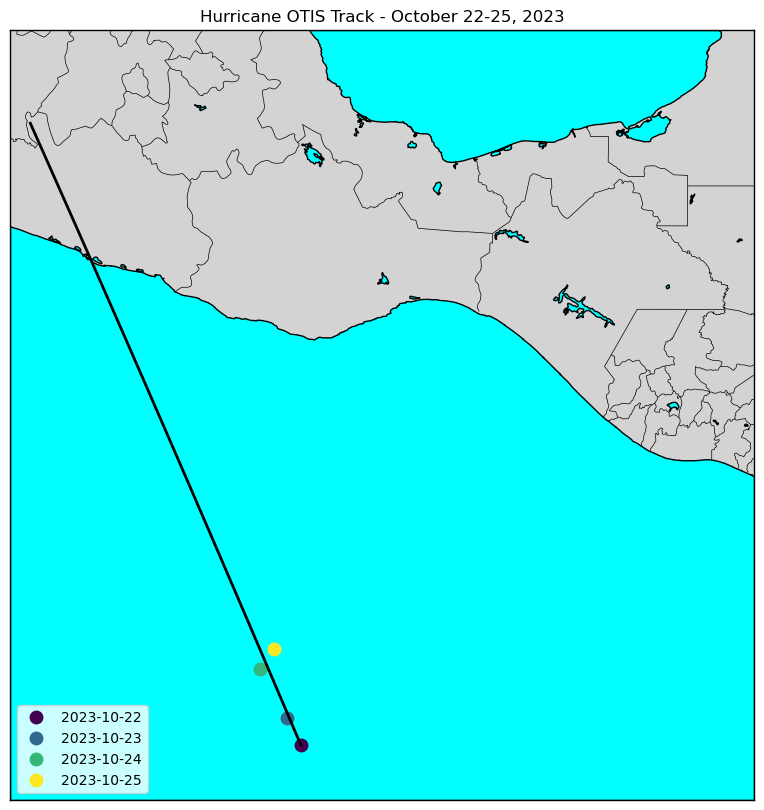

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


latitude_list = [9.8, 10.2, 10.9, 11.2, 11.7, 12.6, 13.3, 13.9, 14.5, 14.9, 15.7, 16.7, 17.8, 18.7]
longitude_list = [-96.7, -96.9, -97.3, -97.1, -97.4, -97.5, -97.8, -98.3, -98.9, -99.3, -99.6, -99.9, -100.4, -100.7]
dates = ['2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25']  


def get_date_color(date, date_list):
    
    norm = plt.Normalize(0, len(date_list) - 1)
    cmap = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    return cmap.to_rgba(date_list.index(date))


fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc',
            llcrnrlon=-101,
            llcrnrlat=9,
            urcrnrlon=-90,
            urcrnrlat=20,
            resolution='h')


m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcoastlines()
m.drawcountries()
m.drawstates()


for lon, lat, date in zip(longitude_list, latitude_list, dates):
    x, y = m(lon, lat)
    color = get_date_color(date, dates)
    m.plot(x, y, 'o', markersize=9, color=color, label=date if date not in ax.get_legend_handles_labels()[1] else "")


m.drawgreatcircle(longitude_list[0], latitude_list[0], longitude_list[-1], latitude_list[-1], linewidth=2, color='black')


plt.legend(loc='lower left')
plt.title('Hurricane OTIS Track - October 22-25, 2023')


plt.show()


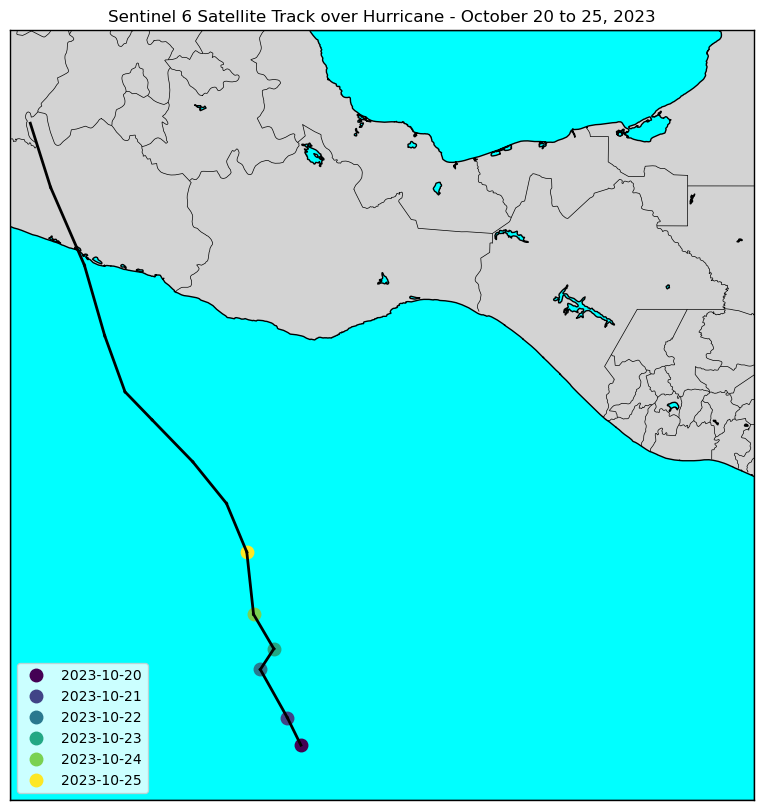

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


latitude_list = [9.8, 10.2, 10.9, 11.2, 11.7, 12.6, 13.3, 13.9, 14.5, 14.9, 15.7, 16.7, 17.8, 18.7]
longitude_list = [-96.7, -96.9, -97.3, -97.1, -97.4, -97.5, -97.8, -98.3, -98.9, -99.3, -99.6, -99.9, -100.4, -100.7]
dates = ['2023-10-20','2023-10-21','2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25']


def get_date_color(date, date_list):
    
    norm = plt.Normalize(0, len(date_list) - 1)
    cmap = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    return cmap.to_rgba(date_list.index(date))


fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc',
            llcrnrlon=-101,
            llcrnrlat=9,
            urcrnrlon=-90,
            urcrnrlat=20,
            resolution='h')


m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcoastlines()
m.drawcountries()
m.drawstates()


for lon, lat, date in zip(longitude_list, latitude_list, dates):
    x, y = m(lon, lat)
    color = get_date_color(date, dates)
    m.plot(x, y, 'o', markersize=9, color=color, label=date if date not in ax.get_legend_handles_labels()[1] else "")


for i in range(len(longitude_list)-1):
    m.plot([longitude_list[i], longitude_list[i+1]], [latitude_list[i], latitude_list[i+1]], color='black', linewidth=2, latlon=True)


plt.legend(loc='lower left')
plt.title('Sentinel 6 Satellite Track over Hurricane - October 20 to 25, 2023')


plt.show()


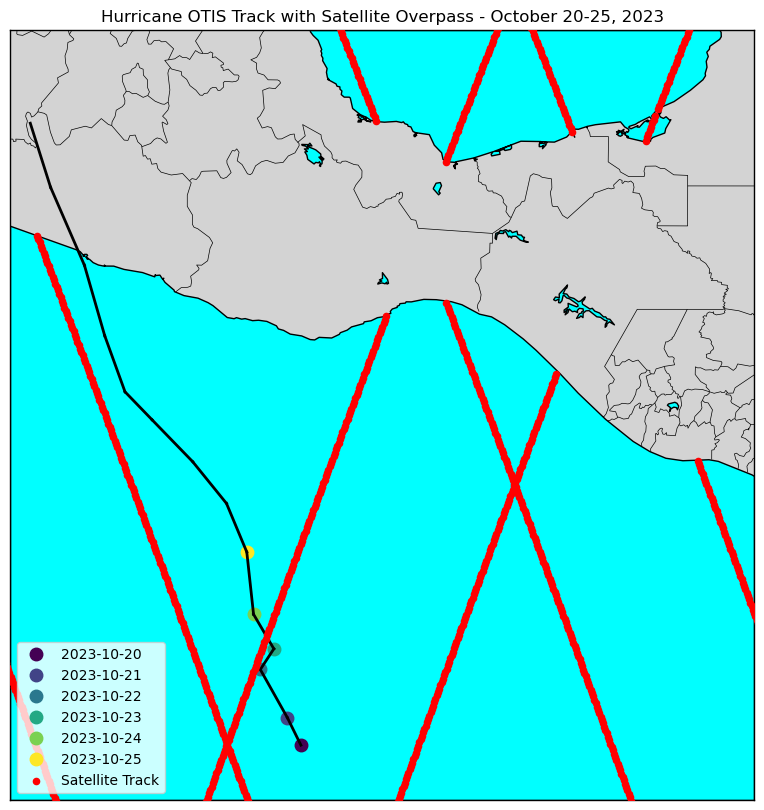

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import os


def get_date_color(date, date_list):
    norm = plt.Normalize(0, len(date_list) - 1)
    cmap = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    return cmap.to_rgba(date_list.index(date))


path_to_nc_files = r'C:\Users\ym221\OneDrive\Desktop\SENTINAL 6'


satellite_track_df = pd.DataFrame()


for nc_file in os.listdir(path_to_nc_files):
    file_path = os.path.join(path_to_nc_files, nc_file)
    with xr.open_dataset(file_path) as ds:
        latitudes = ds.variables['latitude'][:].values
        longitudes = ds.variables['longitude'][:].values
        times = ds.variables['time'][:].values
        
        times = pd.to_datetime(times)

        temp_df = pd.DataFrame({
            'Latitude': latitudes,
            'Longitude': longitudes,
            'Time': times
        })
        
        satellite_track_df = pd.concat([satellite_track_df, temp_df], ignore_index=True)


dates = ['2023-10-20','2023-10-21','2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25']
satellite_track_df['Date'] = satellite_track_df['Time'].dt.date
filtered_satellite_track = satellite_track_df[
    satellite_track_df['Date'].isin(pd.to_datetime(dates).date)
]


fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='merc', llcrnrlon=-101, llcrnrlat=9, urcrnrlon=-90, urcrnrlat=20, resolution='i')

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcoastlines()
m.drawcountries()
m.drawstates()


latitude_list = [9.8, 10.2, 10.9, 11.2, 11.7, 12.6, 13.3, 13.9, 14.5, 14.9, 15.7, 16.7, 17.8, 18.7]
longitude_list = [-96.7, -96.9, -97.3, -97.1, -97.4, -97.5, -97.8, -98.3, -98.9, -99.3, -99.6, -99.9, -100.4, -100.7]


for lon, lat, date in zip(longitude_list, latitude_list, dates):
    x, y = m(lon, lat)
    color = get_date_color(date, dates)
    m.plot(x, y, 'o', markersize=9, color=color, label=date if date not in ax.get_legend_handles_labels()[1] else "")


for i in range(len(longitude_list)-1):
    m.plot([longitude_list[i], longitude_list[i+1]], [latitude_list[i], latitude_list[i+1]], color='black', linewidth=2, latlon=True)


sat_lons = filtered_satellite_track['Longitude'].values
sat_lats = filtered_satellite_track['Latitude'].values
m.scatter(sat_lons, sat_lats, latlon=True, s=20, color='red', zorder=5, label='Satellite Track')


plt.legend(loc='lower left')
plt.title('Hurricane OTIS Track with Satellite Overpass - October 20-25, 2023')

plt.show()

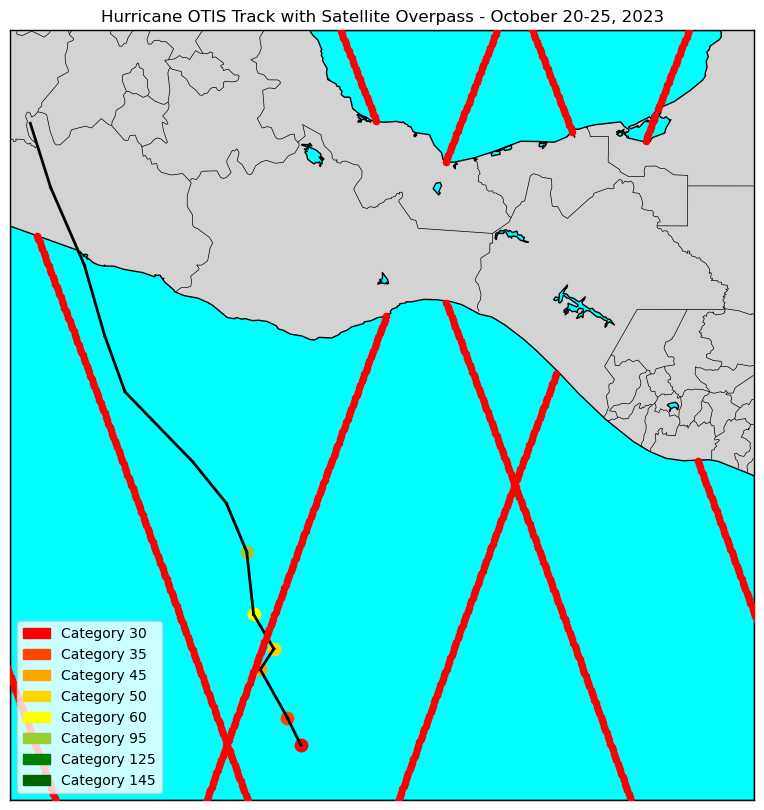

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import matplotlib.patches as mpatches
import os


def get_date_color(date, date_list, categories_colors):
    try:
        category = date_list[date]
        return categories_colors[category]
    except KeyError:
        
        return 'grey'


path_to_nc_files = r'C:\Users\ym221\OneDrive\Desktop\SENTINAL 6'


satellite_track_df = pd.DataFrame()
for nc_file in os.listdir(path_to_nc_files):
    file_path = os.path.join(path_to_nc_files, nc_file)
    with xr.open_dataset(file_path) as ds:
        latitudes = ds.variables['latitude'][:].values
        longitudes = ds.variables['longitude'][:].values
        times = ds.variables['time'][:].values
        
        times = pd.to_datetime(times)

        temp_df = pd.DataFrame({
            'Latitude': latitudes,
            'Longitude': longitudes,
            'Time': times
        })
        
        satellite_track_df = pd.concat([satellite_track_df, temp_df], ignore_index=True)


dates = pd.date_range('2023-10-20', '2023-10-25').tolist()
satellite_track_df['Date'] = satellite_track_df['Time'].dt.date
filtered_satellite_track = satellite_track_df[satellite_track_df['Date'].isin([date.date() for date in dates])]


categories_colors = {
    'Category 30': '#FF0000',
    'Category 35': '#FF4500',
    'Category 45': '#FFA500',
    'Category 50': '#FFD700',
    'Category 60': '#FFFF00',
    'Category 95': '#9ACD32',
    'Category 125': '#008000',
    'Category 145': '#006400',
}


date_to_category = {
    pd.Timestamp('2023-10-20'): 'Category 30',
    pd.Timestamp('2023-10-21'): 'Category 35',
    pd.Timestamp('2023-10-22'): 'Category 45',
    pd.Timestamp('2023-10-23'): 'Category 50',
    pd.Timestamp('2023-10-24'): 'Category 60',
    pd.Timestamp('2023-10-25'): 'Category 95',
   
}


fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='merc', llcrnrlon=-101, llcrnrlat=9, urcrnrlon=-90, urcrnrlat=20, resolution='i')

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcoastlines()
m.drawcountries()
m.drawstates()


latitude_list = [9.8, 10.2, 10.9, 11.2, 11.7, 12.6, 13.3, 13.9, 14.5, 14.9, 15.7, 16.7, 17.8, 18.7]
longitude_list = [-96.7, -96.9, -97.3, -97.1, -97.4, -97.5, -97.8, -98.3, -98.9, -99.3, -99.6, -99.9, -100.4, -100.7]
for date, lon, lat in zip(dates, longitude_list, latitude_list):
    x, y = m(lon, lat)
    color = get_date_color(date, date_to_category, categories_colors)
    m.plot(x, y, 'o', markersize=9, color=color, label=date_to_category[date] if date_to_category[date] not in ax.get_legend_handles_labels()[1] else "")


for i in range(len(longitude_list)-1):
    m.plot([longitude_list[i], longitude_list[i+1]], [latitude_list[i], latitude_list[i+1]], color='black', linewidth=2, latlon=True)


sat_lons = filtered_satellite_track['Longitude'].values
sat_lats = filtered_satellite_track['Latitude'].values
m.scatter(sat_lons, sat_lats, latlon=True, s=20, color='red', zorder=5, label='Satellite Track')


legend_handles = [mpatches.Patch(color=color, label=category) for category, color in categories_colors.items()]
plt.legend(handles=legend_handles, loc='lower left')


plt.title('Hurricane OTIS Track with Satellite Overpass - October 20-25, 2023')


plt.show()


